<>:32: SyntaxWarning: invalid escape sequence '\;'
<>:32: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_195681/1648532764.py:32: SyntaxWarning: invalid escape sequence '\;'
  axs[1].set_title("SDE Force $F(x) = -D \; \dfrac{\mathrm{d}A}{\mathrm{d}x} $")


[  4.70337039 -13.13532647  14.0835169   -6.28918153   0.50390617
   0.49841427   0.49810629   0.50012037]


/home/dbersano/folie/folie/estimation/transitionDensity.py:11: RuntimeWarning: invalid value encountered in log
  return -0.5 * ((xt.ravel() - E) ** 2 / V) - 0.5 * np.log(np.sqrt(2 * np.pi) * V)
/home/dbersano/folie/folie/estimation/transitionDensity.py:11: RuntimeWarning: invalid value encountered in log
  return -0.5 * ((xt.ravel() - E) ** 2 / V) - 0.5 * np.log(np.sqrt(2 * np.pi) * V)
/home/dbersano/folie/folie/estimation/transitionDensity.py:11: RuntimeWarning: invalid value encountered in log
  return -0.5 * ((xt.ravel() - E) ** 2 / V) - 0.5 * np.log(np.sqrt(2 * np.pi) * V)
/home/dbersano/folie/folie/estimation/transitionDensity.py:11: RuntimeWarning: invalid value encountered in log
  return -0.5 * ((xt.ravel() - E) ** 2 / V) - 0.5 * np.log(np.sqrt(2 * np.pi) * V)


[  4.70337039 -13.13532647  14.0835169   -6.28918153   0.50390617
   0.49841427   0.49810629   0.50012037]
[  4.7034088  -13.13530409  14.08354198  -6.28914665   0.50599871
   0.4970207    0.49673502   0.50235767]


/home/dbersano/folie/folie/analysis/overdamped_1d.py:25: RuntimeWarning: divide by zero encountered in divide
  return (-drift_val + diff_prime_val) / diff_val
/home/dbersano/anaconda3/envs/folie/lib/python3.12/site-packages/scipy/integrate/_ivp/rk.py:109: RuntimeWarning: invalid value encountered in divide
  return norm(self._estimate_error(K, h) / scale)


[  4.70340797 -13.13529598  14.08354507  -6.28913848   0.50600583
   0.49701275   0.49673319   0.50236742]
[  4.52060002 -12.71625672  13.90703827  -6.40724239   0.49412951
   0.5112268    0.49618131   0.50113259]
[  4.52060002 -12.71625672  13.90703827  -6.40724239   0.49412951
   0.5112268    0.49618131   0.50113259]
[  4.52062504 -12.71622815  13.90706322  -6.40720481   0.49605927
   0.51010151   0.49487695   0.50328655]
[  4.5206325  -12.71623452  13.90706386  -6.40720034   0.49594578
   0.51001257   0.49487381   0.50338589]
[  4.20216233 -11.74936254  12.59043303  -5.37607561   0.50158903
   0.50429212   0.49273405   0.50163236]
[  4.20216233 -11.74936254  12.59043303  -5.37607561   0.50158903
   0.50429212   0.49273405   0.50163236]
[  4.20217933 -11.74933253  12.59045018  -5.37603445   0.50322432
   0.5030803    0.49172802   0.50357577]
[  4.20219247 -11.74933443  12.59046805  -5.37602035   0.50323722
   0.5030776    0.49172899   0.50358251]
[  5.47423243 -13.26561594  13.694428

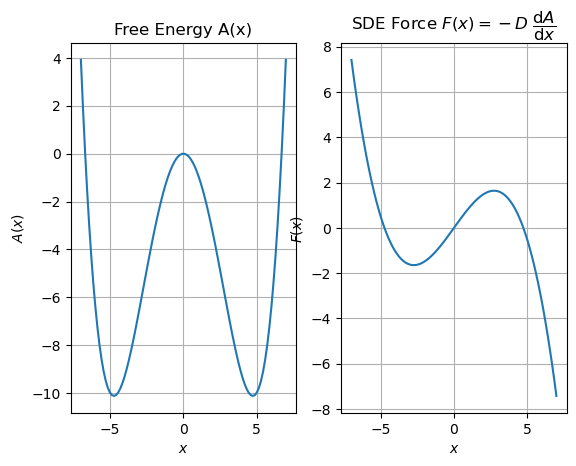

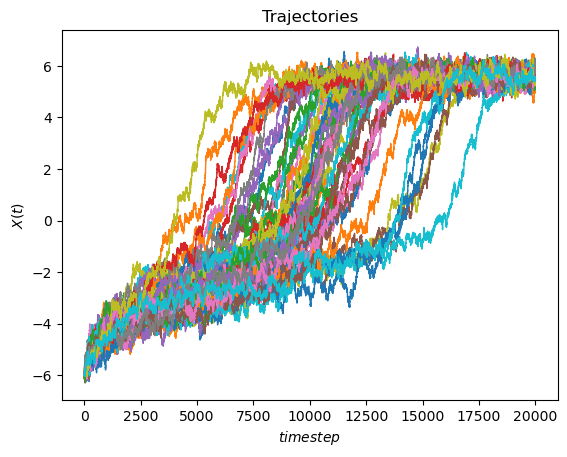

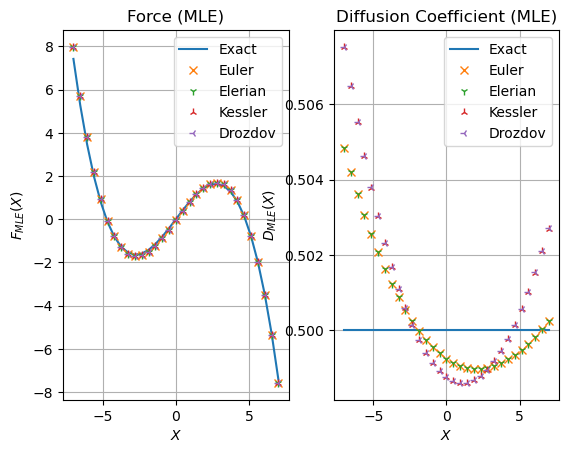

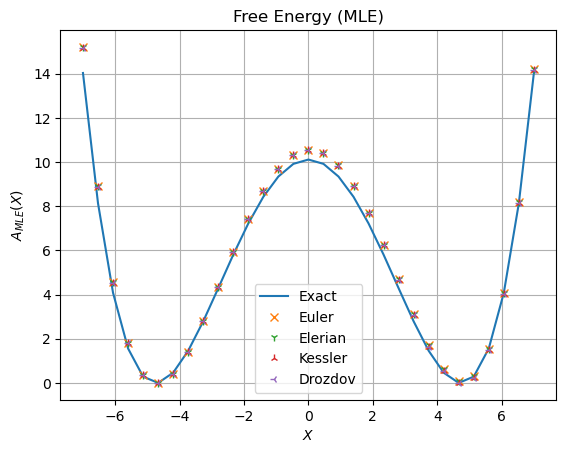

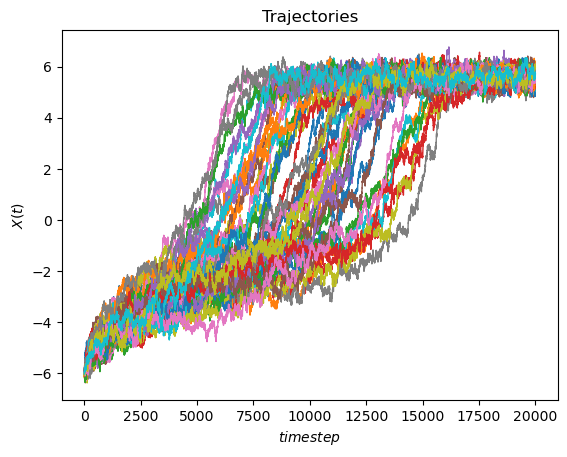

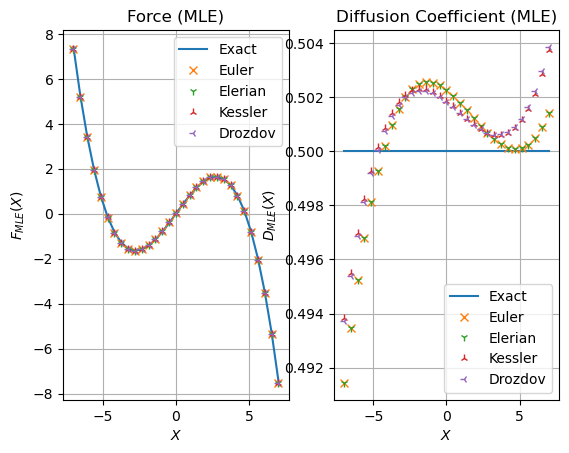

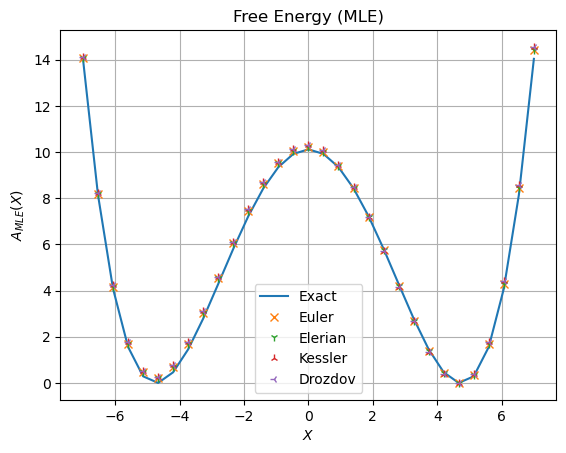

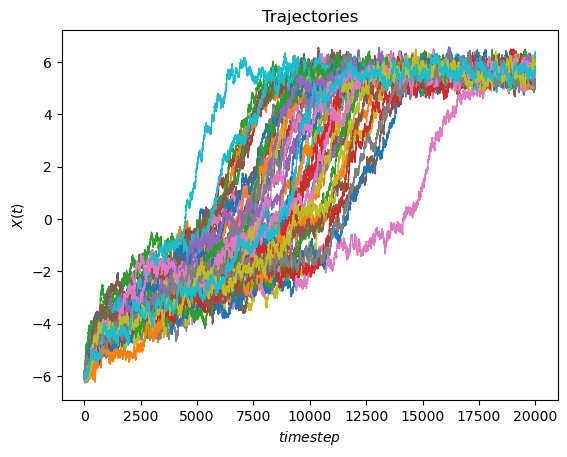

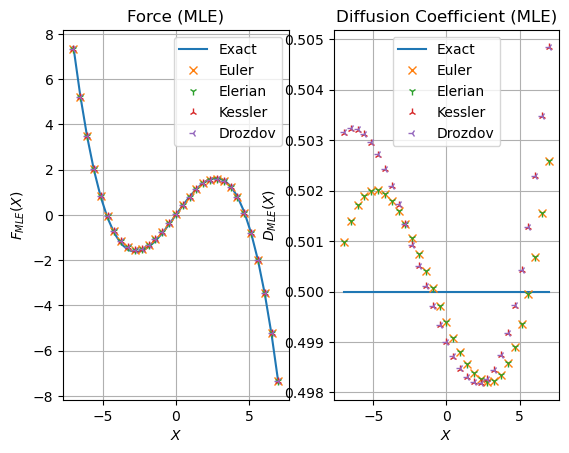

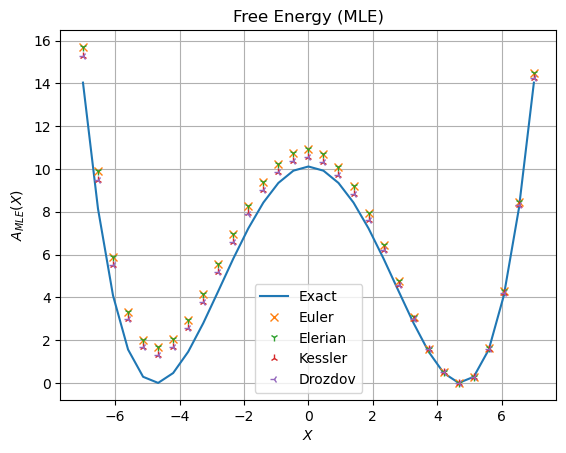

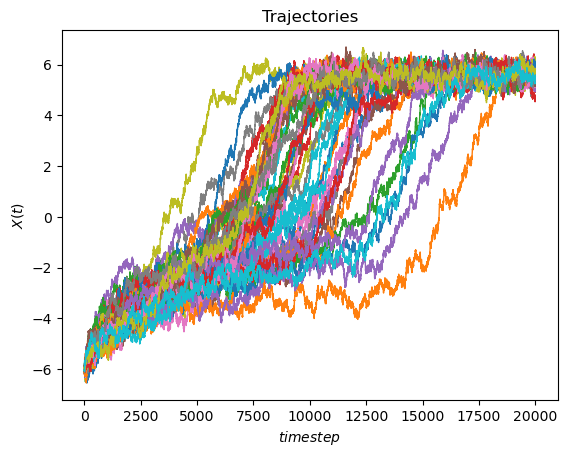

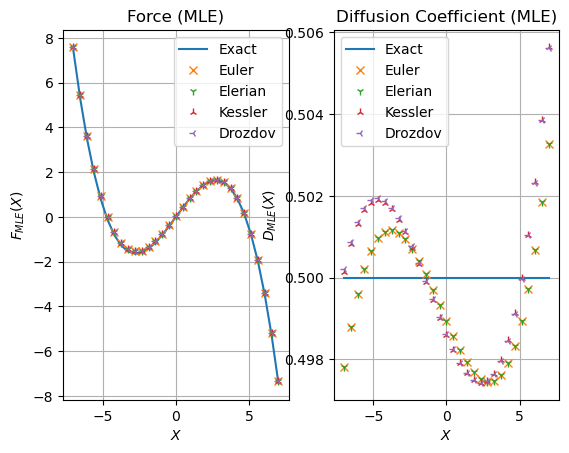

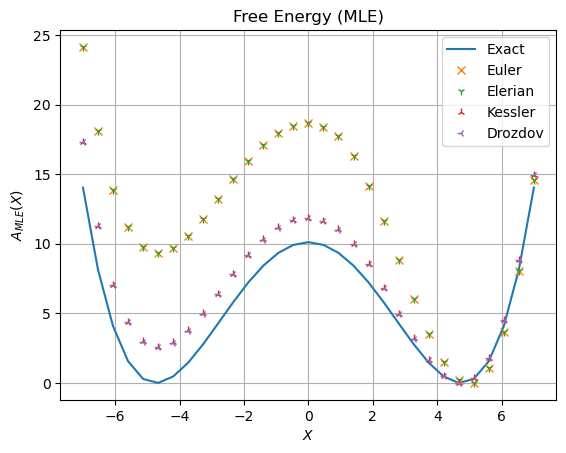

In [1]:
"""
================================
1D  Biased Double Well to generate plots to put in the report
================================

Estimation of an overdamped Langevin.
"""


import numpy as np
import matplotlib.pyplot as plt
import folie as fl
from copy import deepcopy

coeff = 0.2 * np.array([0, 0, -4.5, 0, 0.1])
free_energy = np.polynomial.Polynomial(coeff)
D = np.array([0.5])

drift_coeff = D * np.array([-coeff[1], -2 * coeff[2], -3 * coeff[3], -4 * coeff[4]])
drift_function = fl.functions.Polynomial(deg=3, coefficients=drift_coeff)
diff_function = fl.functions.Polynomial(deg=0, coefficients=D)

# Plot of Free Energy and Force
x_values = np.linspace(-7, 7, 100)
fig, axs = plt.subplots(1, 2)
axs[0].plot(x_values, free_energy(x_values))
axs[1].plot(x_values, drift_function(x_values.reshape(len(x_values), 1)))
axs[0].set_title("Free Energy A(x)")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$A(x)$")
axs[0].grid()
axs[1].set_title("SDE Force $F(x) = -D \; \dfrac{\mathrm{d}A}{\mathrm{d}x} $")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$ F(x) $ ")
axs[1].grid()

# Define model to simulate and type of simulator to use
dt = 1e-3
model_simu = fl.models.overdamped.Overdamped(drift_function, diffusion=diff_function)

model_simu = fl.models.overdamped.Overdamped(drift_function, diffusion=diff_function)
simulator = fl.simulations.ABMD_Simulator(fl.simulations.EulerStepper(model_simu), dt,k=10.0,xstop=6)

###############################################################################################################################################################################################################
###############################################################################################################################################################################################################
#
#                                                                                SET OF DATA NUMBER 1
#
###############################################################################################################################################################################################################
###############################################################################################################################################################################################################

# initialize positions
ntraj = 50
q0 = np.empty(ntraj)
for i in range(len(q0)):
    q0[i] = -6
# Calculate Trajectory
time_steps = 20000
data1 = deepcopy(simulator).run(time_steps, q0, save_every=1)

# Plot resulting Trajectories
fig, axs = plt.subplots()
for n, trj in enumerate(data1):
    axs.plot(trj["x"],linewidth = 1)
    axs.set_title("Trajectories")
    axs.set_xlabel("$timestep$")
    axs.set_ylabel("$X(t)$")
    axs.grid()


fig, axs = plt.subplots(1, 2)
fig, axb = plt.subplots()
axs[0].set_title("Force (MLE)")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$F_{MLE}(X)$")
axs[0].grid()

axs[1].set_title("Diffusion Coefficient (MLE)")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$D_{MLE}(X)$")
axs[1].grid()

xfa = np.linspace(-7.0, 7.0, 31)
model_simu.remove_bias()
axs[0].plot(xfa, model_simu.drift(xfa.reshape(-1, 1)), label="Exact")
axs[1].plot(xfa, model_simu.diffusion(xfa.reshape(-1, 1)), label="Exact")

axb.set_title("Free Energy (MLE)")
axb.set_xlabel("$X$")
axb.set_ylabel("$A_{MLE}(X)$")
axb.grid()
axb.plot(xfa, free_energy(xfa.reshape(-1, 1)) - np.min(free_energy(xfa.reshape(-1, 1))), label="Exact")

n_knots= 4
domain = fl.MeshedDomain.create_from_range(np.linspace(data1.stats.min , data1.stats.max , n_knots).ravel())
trainmodel = fl.models.Overdamped(fl.functions.BSplinesFunction(domain), has_bias=True)
res_vec1=[]
fes1=[]
KM_Estimator = fl.KramersMoyalEstimator(deepcopy(trainmodel))
res_KM = KM_Estimator.fit_fetch(deepcopy(data1))
for name,marker, transitioncls in zip(
    ["Euler", "Elerian", "Kessler", "Drozdov"],
    ["x", "1","2","3","|"],
    [
        fl.EulerDensity,
        fl.ElerianDensity,
        fl.KesslerDensity,
        fl.DrozdovDensity,
    ],
):
    estimator = fl.LikelihoodEstimator(transitioncls(deepcopy(trainmodel)),n_jobs=4)
    res = estimator.fit_fetch(deepcopy(data1),coefficients0=res_KM.coefficients)
    print(res.coefficients)
    res.remove_bias()
    fes = fl.analysis.free_energy_profile_1d(res,xfa)
    res_vec1.append(deepcopy(res))
    fes1.append(deepcopy(fes))

    axs[0].plot(xfa,res.drift(xfa.reshape(-1,1)),marker,label=name)
    axs[1].plot(xfa, res.diffusion(xfa.reshape(-1, 1)),marker, label=name)
    axb.plot(xfa, fes,marker, label=name)
axb.legend()  
axs[0].legend()
axs[1].legend()


###############################################################################################################################################################################################################
###############################################################################################################################################################################################################
#
#                                                                                SET OF DATA NUMBER 2
#
###############################################################################################################################################################################################################
###############################################################################################################################################################################################################

# initialize positions
ntraj = 50
q0 = np.empty(ntraj)
for i in range(len(q0)):
    q0[i] = -6
# Calculate Trajectory
time_steps = 20000
model_simu.add_bias()
data2 = deepcopy(simulator).run(time_steps, q0, save_every=1)

# Plot resulting Trajectories
fig, axs = plt.subplots()
for n, trj in enumerate(data2):
    axs.plot(trj["x"],linewidth = 1)
    axs.set_title("Trajectories")
    axs.set_xlabel("$timestep$")
    axs.set_ylabel("$X(t)$")
    axs.grid()

                               ############################################### here plt.show()
fig, axs = plt.subplots(1, 2)
fig, axb = plt.subplots()
axs[0].set_title("Force (MLE)")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$F_{MLE}(X)$")
axs[0].grid()

axs[1].set_title("Diffusion Coefficient (MLE)")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$D_{MLE}(X)$")
axs[1].grid()

xfa = np.linspace(-7.0, 7.0, 31)
model_simu.remove_bias()
axs[0].plot(xfa, model_simu.drift(xfa.reshape(-1, 1)), label="Exact")
axs[1].plot(xfa, model_simu.diffusion(xfa.reshape(-1, 1)), label="Exact")

axb.set_title("Free Energy (MLE)")
axb.set_xlabel("$X$")
axb.set_ylabel("$A_{MLE}(X)$")
axb.grid()
axb.plot(xfa, free_energy(xfa.reshape(-1, 1)) - np.min(free_energy(xfa.reshape(-1, 1))), label="Exact")

n_knots= 4
domain = fl.MeshedDomain.create_from_range(np.linspace(data2.stats.min , data2.stats.max , n_knots).ravel())
trainmodel = fl.models.Overdamped(fl.functions.BSplinesFunction(domain), has_bias=True)
res_vec2=[]
fes2=[]
KM_Estimator = fl.KramersMoyalEstimator(deepcopy(trainmodel))
res_KM = KM_Estimator.fit_fetch(deepcopy(data2))
for name,marker, transitioncls in zip(
    ["Euler", "Elerian", "Kessler", "Drozdov"],
    ["x", "1","2","3","|"],
    [
        fl.EulerDensity,
        fl.ElerianDensity,
        fl.KesslerDensity,
        fl.DrozdovDensity,
    ],
):
    estimator = fl.LikelihoodEstimator(transitioncls(deepcopy(trainmodel)),n_jobs=4)
    res = estimator.fit_fetch(deepcopy(data2),coefficients0=res_KM.coefficients)
    print(res.coefficients)
    res.remove_bias()
    fes = fl.analysis.free_energy_profile_1d(res,xfa)
    res_vec2.append(deepcopy(res))
    fes2.append(deepcopy(fes))

    axs[0].plot(xfa,res.drift(xfa.reshape(-1,1)),marker,label=name)
    axs[1].plot(xfa, res.diffusion(xfa.reshape(-1, 1)),marker, label=name)
    axb.plot(xfa, fes,marker, label=name)
axb.legend()  
axs[0].legend()
axs[1].legend()

###############################################################################################################################################################################################################
###############################################################################################################################################################################################################
#
#                                                                                SET OF DATA NUMBER 3
#
###############################################################################################################################################################################################################
###############################################################################################################################################################################################################

# initialize positions
ntraj = 50
q0 = np.empty(ntraj)
for i in range(len(q0)):
    q0[i] = -6
# Calculate Trajectory
model_simu.add_bias()
time_steps = 20000
data3 = deepcopy(simulator).run(time_steps, q0, save_every=1)

# Plot resulting Trajectories
fig, axs = plt.subplots()
for n, trj in enumerate(data3):
    axs.plot(trj["x"],linewidth = 1)
    axs.set_title("Trajectories")
    axs.set_xlabel("$timestep$")
    axs.set_ylabel("$X(t)$")
    axs.grid()


fig, axs = plt.subplots(1, 2)
fig, axb = plt.subplots()
axs[0].set_title("Force (MLE)")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$F_{MLE}(X)$")
axs[0].grid()

axs[1].set_title("Diffusion Coefficient (MLE)")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$D_{MLE}(X)$")
axs[1].grid()

xfa = np.linspace(-7.0, 7.0, 31)
model_simu.remove_bias()
axs[0].plot(xfa, model_simu.drift(xfa.reshape(-1, 1)), label="Exact")
axs[1].plot(xfa, model_simu.diffusion(xfa.reshape(-1, 1)), label="Exact")

axb.set_title("Free Energy (MLE)")
axb.set_xlabel("$X$")
axb.set_ylabel("$A_{MLE}(X)$")
axb.grid()
axb.plot(xfa, free_energy(xfa.reshape(-1, 1)) - np.min(free_energy(xfa.reshape(-1, 1))), label="Exact")

n_knots= 4
domain = fl.MeshedDomain.create_from_range(np.linspace(data3.stats.min , data3.stats.max , n_knots).ravel())
trainmodel = fl.models.Overdamped(fl.functions.BSplinesFunction(domain), has_bias=True)
res_vec3=[]
fes3=[]
KM_Estimator = fl.KramersMoyalEstimator(deepcopy(trainmodel))
res_KM = KM_Estimator.fit_fetch(deepcopy(data3))
for name,marker, transitioncls in zip(
    ["Euler", "Elerian", "Kessler", "Drozdov"],
    ["x", "1","2","3","|"],
    [
        fl.EulerDensity,
        fl.ElerianDensity,
        fl.KesslerDensity,
        fl.DrozdovDensity,
    ],
):
    estimator = fl.LikelihoodEstimator(transitioncls(deepcopy(trainmodel)),n_jobs=4)
    res = estimator.fit_fetch(deepcopy(data3),coefficients0=res_KM.coefficients)
    print(res.coefficients)
    res.remove_bias()
    fes = fl.analysis.free_energy_profile_1d(res,xfa)
    res_vec3.append(deepcopy(res))
    fes3.append(deepcopy(fes))

    axs[0].plot(xfa,res.drift(xfa.reshape(-1,1)),marker,label=name)
    axs[1].plot(xfa, res.diffusion(xfa.reshape(-1, 1)),marker, label=name)
    axb.plot(xfa, fes,marker, label=name)
axb.legend()  
axs[0].legend()
axs[1].legend()

###############################################################################################################################################################################################################
###############################################################################################################################################################################################################
#
#                                                                                SET OF DATA NUMBER 4
#
###############################################################################################################################################################################################################
###############################################################################################################################################################################################################

# initialize positions
ntraj = 50
q0 = np.empty(ntraj)
for i in range(len(q0)):
    q0[i] = -6
# Calculate Trajectory
model_simu.add_bias()
time_steps = 20000
data4 = deepcopy(simulator).run(time_steps, q0, save_every=1)

# Plot resulting Trajectories
fig, axs = plt.subplots()
for n, trj in enumerate(data4):
    axs.plot(trj["x"],linewidth = 1)
    axs.set_title("Trajectories")
    axs.set_xlabel("$timestep$")
    axs.set_ylabel("$X(t)$")
    axs.grid()


fig, axs = plt.subplots(1, 2)
fig, axb = plt.subplots()
axs[0].set_title("Force (MLE)")
axs[0].set_xlabel("$X$")
axs[0].set_ylabel("$F_{MLE}(X)$")
axs[0].grid()

axs[1].set_title("Diffusion Coefficient (MLE)")
axs[1].set_xlabel("$X$")
axs[1].set_ylabel("$D_{MLE}(X)$")
axs[1].grid()

xfa = np.linspace(-7.0, 7.0, 31)
model_simu.remove_bias()
axs[0].plot(xfa, model_simu.drift(xfa.reshape(-1, 1)), label="Exact")
axs[1].plot(xfa, model_simu.diffusion(xfa.reshape(-1, 1)), label="Exact")

axb.set_title("Free Energy (MLE)")
axb.set_xlabel("$X$")
axb.set_ylabel("$A_{MLE}(X)$")
axb.grid()
axb.plot(xfa, free_energy(xfa.reshape(-1, 1)) - np.min(free_energy(xfa.reshape(-1, 1))), label="Exact")

n_knots= 4
domain = fl.MeshedDomain.create_from_range(np.linspace(data4.stats.min , data4.stats.max , n_knots).ravel())
trainmodel = fl.models.Overdamped(fl.functions.BSplinesFunction(domain), has_bias=True)
res_vec4=[]
fes4=[]
KM_Estimator = fl.KramersMoyalEstimator(deepcopy(trainmodel))
res_KM = KM_Estimator.fit_fetch(deepcopy(data4))
for name,marker, transitioncls in zip(
    ["Euler", "Elerian", "Kessler", "Drozdov"],
    ["x", "1","2","3","|"],
    [
        fl.EulerDensity,
        fl.ElerianDensity,
        fl.KesslerDensity,
        fl.DrozdovDensity,
    ],
):
    estimator = fl.LikelihoodEstimator(transitioncls(deepcopy(trainmodel)),n_jobs=4)
    res = estimator.fit_fetch(deepcopy(data4),coefficients0=res_KM.coefficients)
    print(res.coefficients)
    res.remove_bias()
    fes = fl.analysis.free_energy_profile_1d(res,xfa)
    res_vec4.append(deepcopy(res))
    fes4.append(deepcopy(fes))
    axs[0].plot(xfa,res.drift(xfa.reshape(-1,1)),marker,label=name)
    axs[1].plot(xfa, res.diffusion(xfa.reshape(-1, 1)),marker, label=name)
    axb.plot(xfa, fes,marker, label=name)
axb.legend()  
axs[0].legend()
axs[1].legend()



[4.62061396 4.58635311 4.55240302 4.51501283 4.47206038 4.42431093
 4.37353726 4.32186602 4.27140382 4.22398626 4.18102491 4.14343322
 4.11161492 4.08549892 4.06460392 4.0481166  4.03548353 3.99869402
 3.74239886 3.30020852 2.75029497 2.1494072  1.54725301 0.98624433
 0.49956576 0.11477141 0.16048316 0.30023385 0.30989701 0.20247327
 0.15943445]


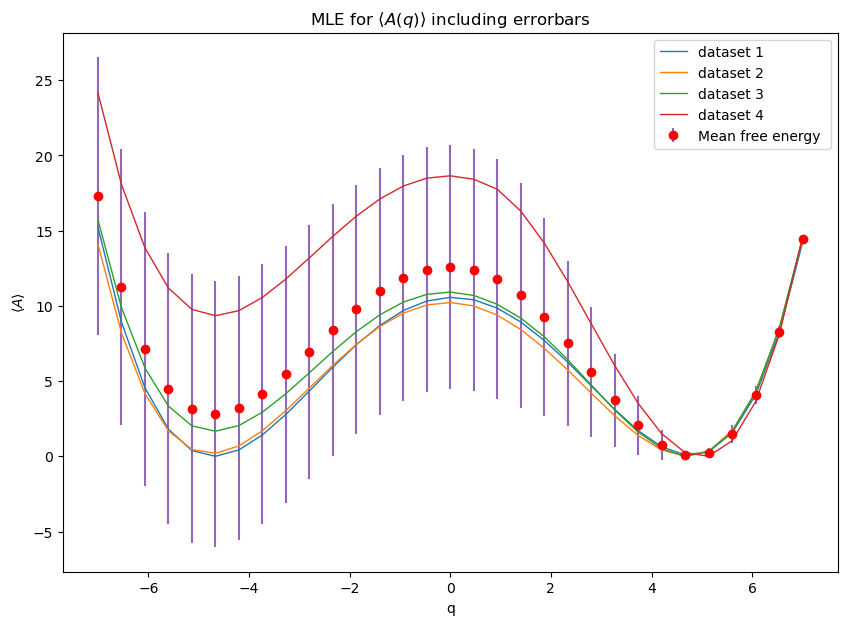

In [2]:
mean_fes=np.empty_like(fes)

for i in range(len(fes)): #sum over xfa points
    sum=0
    sum+=(fes1[0][i]+fes2[0][i]+fes3[0][i]+fes4[0][i]) # sum over the replicas for the jth estimator
    mean_fes[i]= sum/4
# plt.scatter(xfa,mean_fes,marker='2')

var_fes=np.empty_like(fes)
err =np.empty_like(var_fes)
for i in range(len(fes)):
     sum = ((fes1[0][i]-mean_fes[i])**2+(fes2[0][i]-mean_fes[i])**2 + (fes3[0][i]-mean_fes[i])**2 + (fes4[0][i]-mean_fes[i])**2 ) # sum over the replicas for the jth estimator 
     var_fes[i]= sum/3

err = np.sqrt(var_fes)
fig, ax =plt.subplots(figsize=(10,7))
ax.errorbar(xfa,mean_fes,yerr=2*err,fmt='o',color ='red', ecolor='C4',alpha=1, label="Mean free energy ")
ax.set_xlabel('q')
ax.set_ylabel('$\\langle A \\rangle$')
ax.set_title("MLE for $\\langle A (q)\\rangle$ including errorbars")


ax.plot(xfa,fes1[0],label ='dataset 1',linewidth=1)
ax.plot(xfa,fes2[0],label ='dataset 2',linewidth=1)
ax.plot(xfa,fes3[0],label ='dataset 3',linewidth=1)
ax.plot(xfa,fes4[0],label ='dataset 4',linewidth=1)


# ax.scatter(xfa,fes1,marker='x',s=50,label ='dataset 1')
# ax.scatter(xfa,fes2,marker='1',s=50,label ='dataset 2')
# ax.scatter(xfa,fes3,marker='2',s=50,label ='dataset 3')
# ax.scatter(xfa,fes4,marker='3',s=50,label ='dataset 4')

ax.legend()
    # var_fes[i]= (fes1[i]**2+fes2[i]**2+fes3[i]**2+fes4[i]**2)/4 - mean_fes[i]**2
print(err)

/tmp/ipykernel_195681/3197115127.py:17: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(var_fes)


<ErrorbarContainer object of 3 artists>

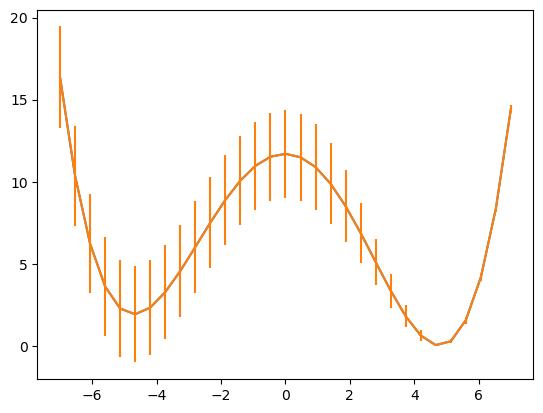

In [3]:
mean_fes=np.empty_like(fes)

for i in range(len(fes)): #sum over xfa points
    sum=0
    for j in range(4):  #sum over estmator Euler kessler & company
        sum+=(fes1[j][i]+fes2[j][i]+fes3[j][i]+fes4[j][i]) # sum over the replicas for the jth estimator
    mean_fes[i]= sum/16
plt.plot(xfa,mean_fes)

var_fes=np.empty_like(fes)
err =np.empty_like(var_fes)
for i in range(len(fes)):
     sum=0
     for j in range(4):  #sum over estmator Euler kessler & company
        sum+=(fes1[j][i]**2+fes2[j][i]**2+fes3[j][i]**2+fes4[j][i]**2) # sum over the replicas for the jth estimator 
        var_fes[i]= sum/16 - mean_fes[i]**2
        err = np.sqrt(var_fes)

plt.errorbar(xfa,mean_fes,yerr=err)
    # var_fes[i]= (fes1[i]**2+fes2[i]**2+fes3[i]**2+fes4[i]**2)/4 - mean_fes[i]**2